# Fit Binding Curves For Designed Sho1 Orthologs

Intrinsic tryptophan of SH3 domain can be excited to emit fluorescence. ($λ_{ex}$ ≈ 296nm; $λ_{em}$ ≈ 330 nm). PBS binding changes the local chemical environment of the tryptophan indole rings and strongly enhance the emission intensity. The signal increase is proportional to the increase of bound SH3, enabling the quantification of SH3 fraction bound at different peptide concentrations.
$K_d$ is determined by fluorescence titrations. Titration curves are fitted to the following equation using python module scipy.optimize.curve_fit:

Fraction of binding = $\frac{x}{x+K_d}$

$x$: Total concentration of PBS2 ligand/µM

Fraction of binding = $\frac{F - F_{min}}{F_{max}-F_{min}}$

$F$: Fluorescence intensity

For each construct, measurement of dissociation constant ($K_d$) is based on three independent titrations. 

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [2]:
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 8})
size = 20

In [3]:
conc1 = [0.  ,.1 ,.3 ,.4 ,.8 ,1.6,3.2,6.3,12.5,25,49.8]
conc2 = np.array([0.  ,.1 ,.2 ,.4 ,.8 ,1.6,3.2,6.3,12.6,25.2,50.2])

theo_conc = np.linspace(0, 70,6000)

In [4]:
class binding_func():
    
    def __init__(self, signal, conc = conc2):
        # same conc for all experiments...
        
        signal_array = np.array(signal)
        
        self.conc = conc
        self.fract = (signal_array-min(signal))/(max(signal)-min(signal))
        self.kd, self.cov = self.get_kd()[0][0], self.get_kd()[1][0]

    def fit_bind_equa(self, x, Kd):
        y = x / (Kd + x)
        return y
        
    def get_kd(self):
        Kd, covariance = curve_fit(self.fit_bind_equa, self.conc, self.fract)
        return Kd, covariance
    
def plot_curve(c1,c2,c3, name, conc = conc2):
    
    mean_kd = round((c1.kd+c2.kd+c3.kd)/3,2)
    std_kd = round(np.std([c1.kd,c2.kd,c3.kd]),2)
    
    plt.figure(figsize=[2.5,2],dpi=300)
    for ci in [c1,c2,c3]:
        plt.scatter(conc, ci.fract, s=size,edgecolor='k')
    for ci in [c1,c2,c3]:
        plt.plot(theo_conc, theo_conc/(theo_conc + ci.kd))
    #plt.plot(theo_conc, theo_conc/(theo_conc + mean_kd), 'k',lw=1.5)
    plt.xscale('log')
    plt.xlim([0.01,70])
    plt.ylabel('Fraction bound')
    plt.xlabel('Pbs2 [uM]')
    plt.title(name+'-$SH3^{Sho1}$: $K_d$ = '+str(mean_kd)+' ± '+str(std_kd),fontsize=8)
    plt.tight_layout()

## O1

In [5]:
o11fl = np.array([342,340,345,357,372,403,407,418,421 ,408,404])
o12fl = np.array([319, 313, 314, 323, 340, 363, 373, 388, 390, 380, 381])
o13fl = np.array([351,358,354,363,388,412,422,432,420 ,408,406])

In [6]:
o11_func = binding_func(signal=o11fl,conc=conc1)
o12_func = binding_func(signal=o12fl,conc=conc1)
o13_func = binding_func(signal=o13fl,conc=conc1)
mean1_kd = round((o11_func.kd+o12_func.kd+o13_func.kd)/3,2)
std1_kd = round(np.std([o11_func.kd,o12_func.kd,o13_func.kd]),2)

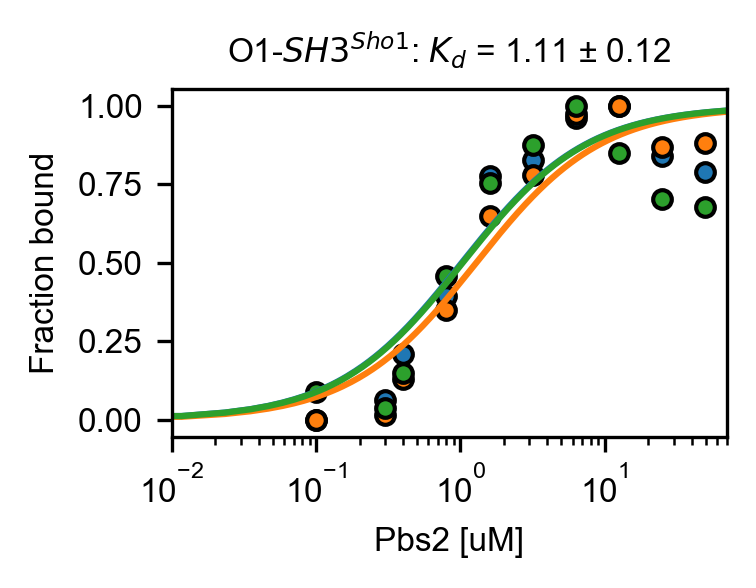

In [7]:
plot_curve(o11_func,o12_func,o13_func, 'O1', conc = conc1)
#plt.savefig('AssayFig/o1.pdf')

## O2

In [8]:
o21fl = np.array([394,423,442,459,487,516,542,555,536,540,540])
o22fl = np.array([373,390,408,433,453,483,499,510,523,521,531])
o23fl = np.array([326,327,335,349,361,372,378,390,387,381,384])

In [9]:
o21_func = binding_func(signal=o21fl)
o22_func = binding_func(signal=o22fl)
o23_func = binding_func(signal=o23fl)
mean2_kd = round((o21_func.kd+o22_func.kd+o23_func.kd)/3,2)
std2_kd = round(np.std([o21_func.kd,o22_func.kd,o23_func.kd]),2)

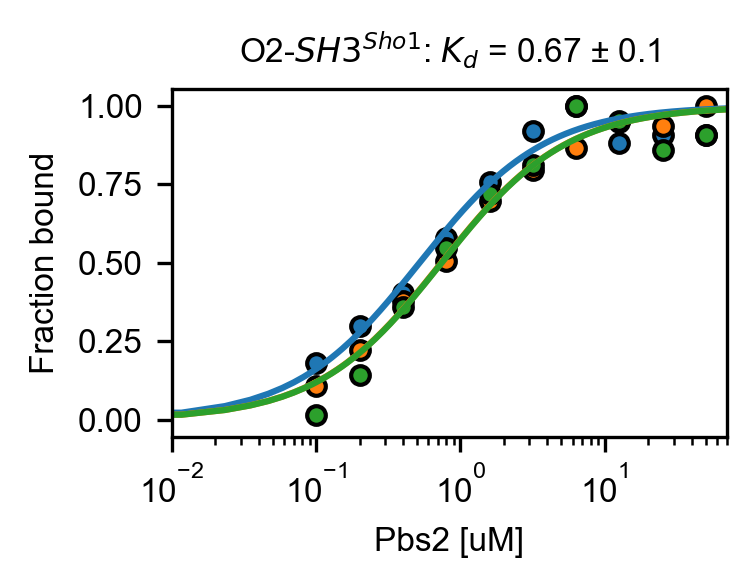

In [10]:
plot_curve(o21_func,o22_func,o23_func, 'O2')
#plt.savefig('AssayFig/o2.pdf')

## O3

In [11]:
o31fl = np.array([412,439,467,508,542,557,564,562,563,554,558])
o32fl = np.array([420,445,465,495,530,547,556,549,542,545,533])
o33fl = np.array([415,432,456,488,528,542,552,545,542, 542,530])

In [12]:
o31_func = binding_func(signal=o31fl)
o32_func = binding_func(signal=o32fl)
o33_func = binding_func(signal=o33fl)
mean3_kd = round((o31_func.kd+o32_func.kd+o33_func.kd)/3,2)
std3_kd = round(np.std([o31_func.kd,o32_func.kd,o33_func.kd]),2)

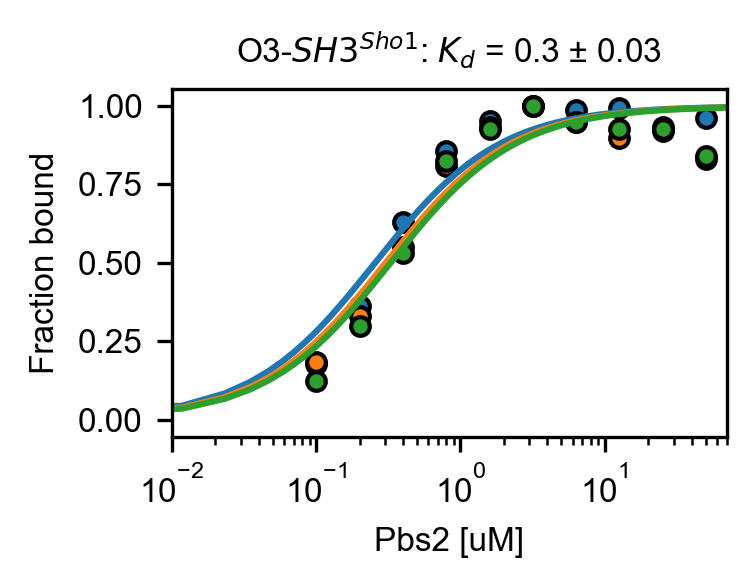

In [13]:
plot_curve(o31_func,o32_func,o33_func, 'O3')
#plt.savefig('AssayFig/o3.pdf')

## O4

In [14]:
o41fl = np.array([318,317,324,336,349,377,397,424,425,432,441])
o42fl = np.array([309,314,311,319,339,348,370,378,388,391,399])
o43fl = np.array([299,285,281,281,287,297,307,313,321,320,325])

In [15]:
o41_func = binding_func(signal=o41fl)
o42_func = binding_func(signal=o42fl)
o43_func = binding_func(signal=o43fl)
mean4_kd = round((o41_func.kd+o42_func.kd+o43_func.kd)/3,2)
std4_kd = round(np.std([o41_func.kd,o42_func.kd,o43_func.kd]),2)

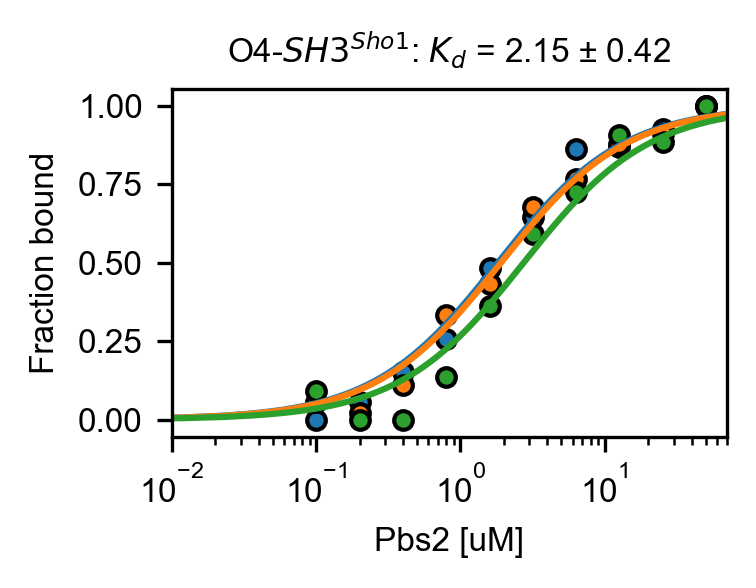

In [16]:
plot_curve(o41_func,o42_func,o43_func, 'O4')
#plt.savefig('AssayFig/o4.pdf')

## O5

In [17]:
o51fl = np.array([384,417,425,447,485,533,587,608,595 ,591 ,606])
o52fl = np.array([337,346,360,381,419,463,488,513,519 ,512 ,511])
o53fl = np.array([343,361,373,390,425,472,514,533,520, 527 ,523])

In [18]:
o51_func = binding_func(signal=o51fl)
o52_func = binding_func(signal=o52fl)
o53_func = binding_func(signal=o53fl)
mean5_kd = round((o51_func.kd+o52_func.kd+o53_func.kd)/3,2)
std5_kd = round(np.std([o51_func.kd,o52_func.kd,o53_func.kd]),2)

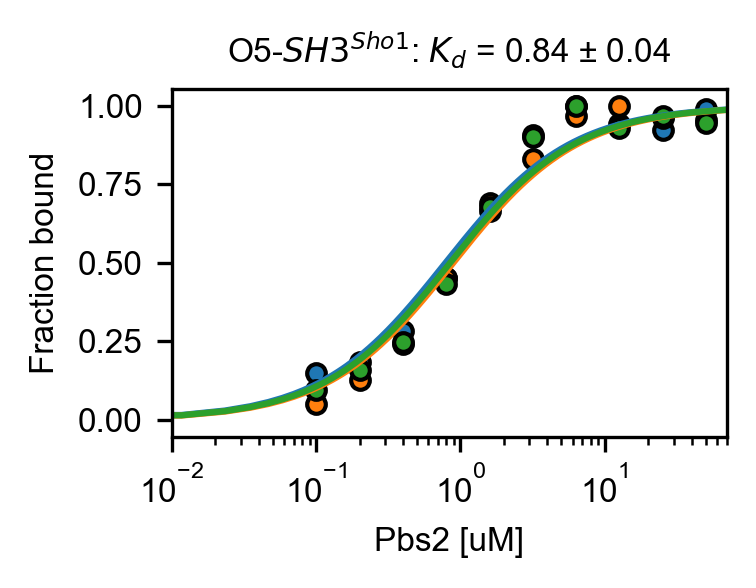

In [19]:
plot_curve(o51_func,o52_func,o53_func, 'O5')
#plt.savefig('AssayFig/o5.pdf')

## Full construct WT-Sho1

In [6]:
wt1fl = [422, 465, 437, 451, 489, 548, 614, 673, 722, 761, 780]
wt2fl = [459, 453, 460, 481, 513, 570, 649, 704, 755, 786, 818]
wt3fl = [445, 450, 454, 468, 501, 558, 611, 686, 743, 767, 785]

In [7]:
wt1_func = binding_func(signal=wt1fl)
wt2_func = binding_func(signal=wt2fl)
wt3_func = binding_func(signal=wt3fl)
meanwt_kd = round((wt1_func.kd+wt2_func.kd+wt3_func.kd)/3,2)
stdwt_kd = round(np.std([wt1_func.kd,wt2_func.kd,wt3_func.kd]),2)

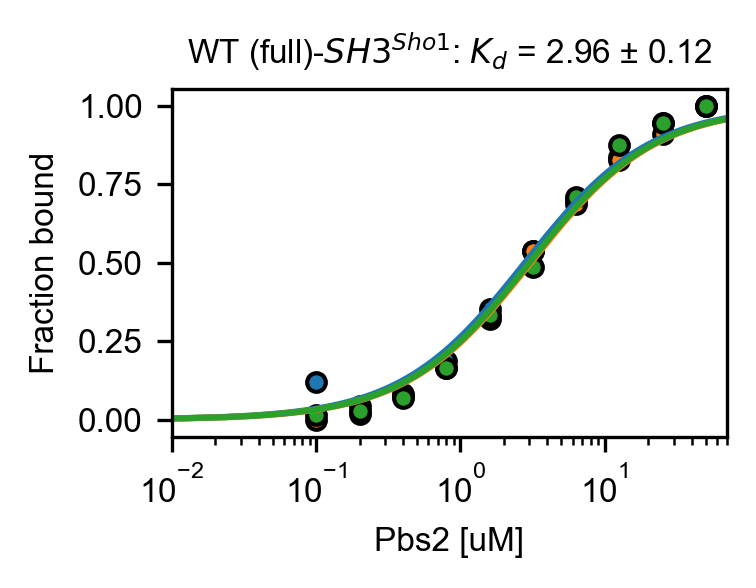

In [8]:
plot_curve(wt1_func,wt2_func,wt3_func, 'WT (full)')

# Melting temperature

Melting temperature of each protein was measured by DSC.

In [10]:
# Read Tm data

Tm_list = []
for i in range(5):
    Tm_list.append(pd.read_csv('data/Melting_temperature/Tm_SH3_O'+str(i+1)+'.csv'))
Tm_list.append(pd.read_csv('data/Melting_temperature/Tm_SH3_Sho1_WT.CSV'))

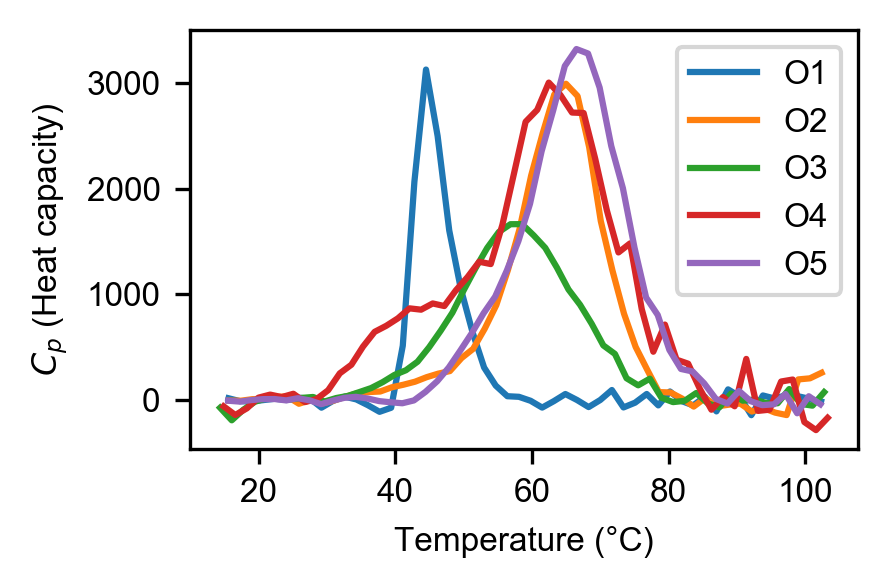

In [15]:
plt.figure(figsize=[3,2],dpi=300)
for i in range(5):
    plt.plot(Tm_list[i].temp[:-3], Tm_list[i].cp[:-3], label = 'O' + str(i+1))
plt.xlabel('Temperature (°C)')
plt.ylabel('$C_p$ (Heat capacity)')
plt.legend()
plt.tight_layout()
#plt.savefig('../VAE_design_paper/SIs/Tm.pdf')
plt.show()

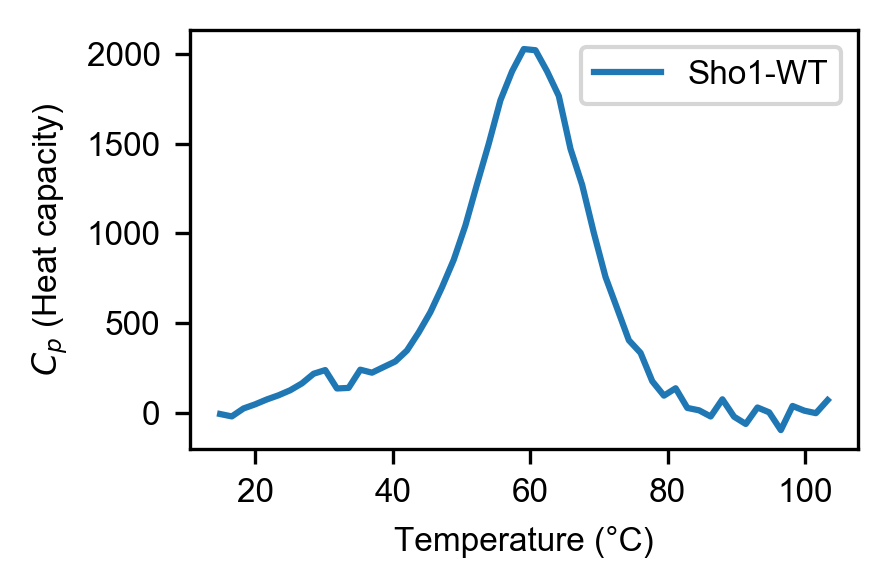

In [13]:
plt.figure(figsize=[3,2],dpi=300)
plt.plot(Tm_list[-1].temp[:-3], Tm_list[-1].cp[:-3], label = 'Sho1-WT')
plt.xlabel('Temperature (°C)')
plt.ylabel('$C_p$ (Heat capacity)')
plt.legend()
plt.tight_layout()
#plt.savefig('../VAE_design_paper/SIs/Tm.pdf')
plt.show()